Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas.

* A study for diagnosing breast cancer had humans correctly classifying the examples 65% of the Time; the `decision tree` classified 72% correct
* British Petroleum designed a `decision tree` for gas-oil separaIon for offshore oil platforms that replaced an earlier rule-based expert system
* Cessna designed an airplane flight controller using 90,000 examples and 20 attributes per example

In general, decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning. 

Decision Tree is a supervised learning method used for both classification and regression tasks. 
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules. 

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. 

 A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

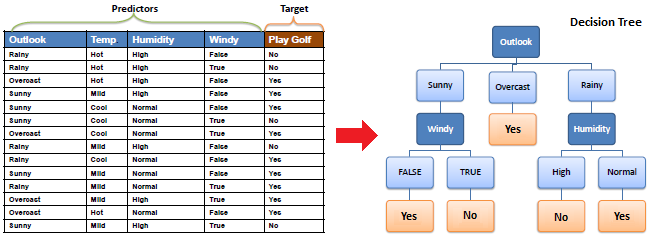

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.

### Entropy

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

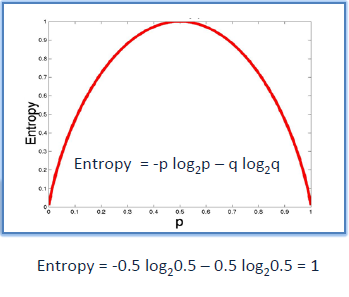

To build a decision tree, we need to calculate two types of entropy using frequency tables as follows:
1. Entropy using the frequency table of one attribute:

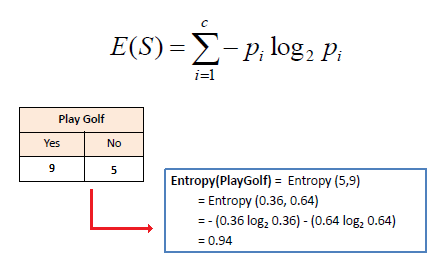

2. Entropy using the frequency table of two attributes:

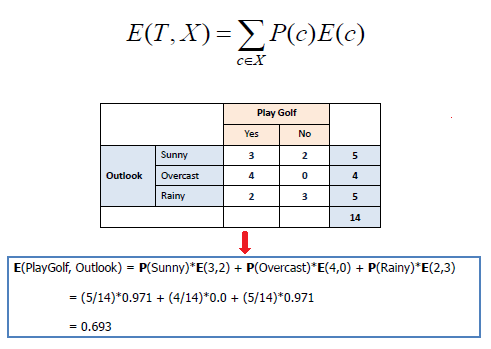

### Information Gain

The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches)

Step 1: Calculate entropy of the target.

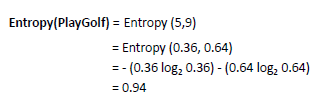

Step 2: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

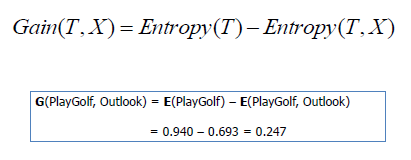

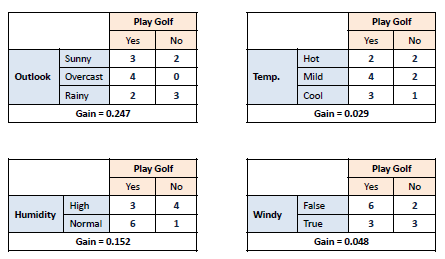

Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

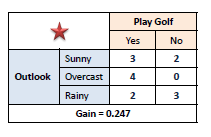

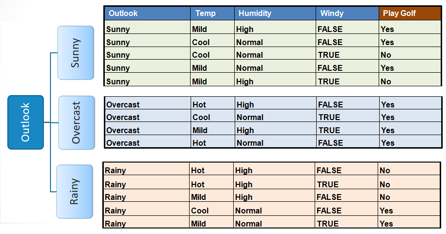

Step 4a: A branch with entropy of 0 is a leaf node.

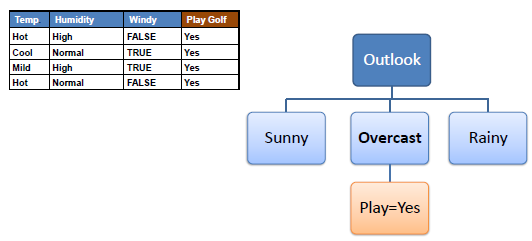

Step 4b: A branch with entropy more than 0 needs further splitting.

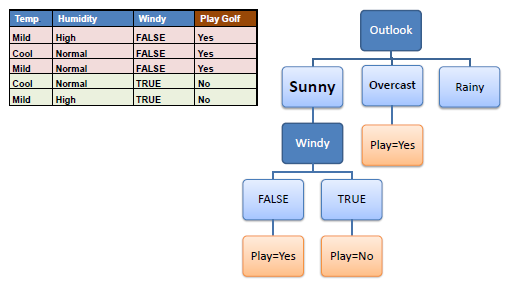

Step 5: The ID3 algorithm is run recursively on the non-leaf branches, until all data is classified.

### Decision Tree to Decision Rules

A decision tree can easily be transformed to a set of rules by mapping from the root node to the leaf nodes one by one.

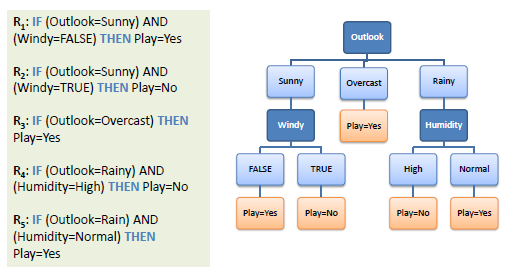

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [3]:
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target

print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 150


In [4]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [5]:

clf = DecisionTreeClassifier(criterion = 'entropy')


In [6]:

clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [8]:

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


Next, we will tune the parameters of the decision tree to increase its accuracy. One of those parameters is 'min_samples_split', which is the minimum number of samples required to split an internal node. Its default value is equal to 2 because we cannot split on a node containing only one example/ sample.

In [9]:

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))


Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158


We can see that the accuracy on the test set increased, while it decreased on the training set. This is because increasing the value of the min_sample_split smoothens the decision boundary and thus prevents it from overfitting. 

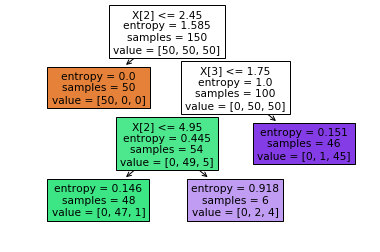

In [11]:

from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


## Challange-1

You have given a dataset named `mobiles` for performing decision tree. Experiment as above and print the accuracy results(try to find the best parametres)

## Challange-2

Choose any of the dataset suitable for regression and apply decision tree and comapre with linear regression